In [2]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Playground

In [15]:
from tensorboardX import SummaryWriter

In [21]:
writer = SummaryWriter(flush_secs=1)

In [22]:
for i in range(100):
    writer.add_scalar('data/test3',10 + np.random.rand(),i)
    writer.add_scalar('data/test2',8 + np.random.rand()*2,i)
    time.sleep(1)

In [16]:
writer.export_scalars_to_json("test.json")

In [1]:
!start .

In [46]:
y = []
x = []


for i in tqdm_notebook(range(100)):
    x.append(i)
    y.append(8 + np.random.rand()*2)
    if len(x) > 2:
        fig = px.line(x = x,y = y)
        fig.show()
    time.sleep(1)

# Wander dev

In [5]:
angle = 2*np.pi*130/360
angle

2.2689280275926285

In [6]:
x = np.cos(angle)
y = np.sin(angle)

x,y

(-0.6427876096865394, 0.766044443118978)

In [63]:
def sample_unit_movement_from_angle(angle):
    # TODO does not allow diagonal movement for now
    
    # Compute cos and sin
    x = np.cos(angle)
    y = np.sin(angle)
    
    # Test conditions
    if x == 0.0:
        return (0,y)
    elif y == 0.0:
        return (x,0)
    
    # Compute signs
    sign_x = x / np.abs(x)
    sign_y = y / np.abs(y)
    
    # Compute absolute values and probabilities
    x,y = np.abs([x,y])
    py = y / (x+y)
    
    # Compute dx and dy based on probabilities
    dy = np.random.binomial(1,py)
    dx = 1 - dy
    
    # Add signs
    dx *= sign_x
    dy *= sign_y
    
    return dx,dy

In [119]:
%%timeit

angle = 2*np.pi*80/360
angle

sample_unit_movement_from_angle(angle)

10.7 µs ± 366 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [98]:
def sample_unit_movement_from_angle2(angle):
    # TODO does not allow diagonal movement for now
    
    # Compute cos and sin
    x = np.cos(angle)
    y = np.sin(angle)
    
    # Test conditions
    if x == 0.0:
        return (0,y)
    elif y == 0.0:
        return (x,0)
    
    # Compute signs
    sign_x = x / np.abs(x)
    sign_y = y / np.abs(y)
    
    # Compute absolute values and probabilities
    x,y = np.abs([x,y])

    # Draw values between 0 and x,y
    xd = np.random.uniform(0,x)
    yd = np.random.uniform(0,y)
    
    if xd > yd:
        return (sign_x,0)
    else:
        return (0,sign_y)

In [118]:
%%timeit

angle = 2*np.pi*80/360
angle

sample_unit_movement_from_angle2(angle)

9.95 µs ± 80.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [15]:
px = x / (x+y)
py = y / (x+y)

In [20]:
py

0.543744331762962

In [123]:
def angle_generator(curiosity = 5):
    
    i = 0
    while True:
        if i % curiosity == 0:
            angle = np.random.uniform(0,100)
        i += 1
        yield angle

In [124]:
j = 0

for i in angle_generator(3):
    
    j += 1
    print(i)
    
    if j > 20:
        break
    

57.97015391327373
57.97015391327373
57.97015391327373
37.44995745919195
37.44995745919195
37.44995745919195
84.2366876477437
84.2366876477437
84.2366876477437
49.54391049122721
49.54391049122721
49.54391049122721
78.91303912701572
78.91303912701572
78.91303912701572
61.02923817760082
61.02923817760082
61.02923817760082
89.47293713125248
89.47293713125248
89.47293713125248


In [8]:
np.abs([x,y])

array([0.64278761, 0.76604444])

In [9]:
np.random.choice([x,y],p = [*np.abs([x,y])])

ValueError: probabilities do not sum to 1

# Vision range

In [135]:
N = 10
x = np.random.randint(0,100,N)
y = np.random.randint(0,100,N)
n = list(range(N))
points = list(zip(x,y))

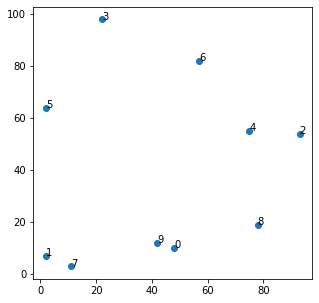

In [136]:
fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(x,y)

for i in range(N):
    ax.annotate(i, (x[i], y[i]))
plt.show()

In [137]:
from scipy.spatial.kdtree import KDTree

In [139]:
tree = KDTree(points)

In [141]:
points[0]

(48, 10)

In [149]:
%%timeit

tree.query_ball_point(points[0],40)

58.6 µs ± 1.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Dev simulation COVID

In [241]:
import sys
sys.path.append("c:/git/westworld/")

from westworld.environment.grid import GridEnvironment
from westworld.agents.grid import GridAgent,Obstacle,Trigger
from westworld.simulation.simulation import Simulation
from westworld.colors import *

In [318]:
# Setup constants
BOX_SIZE = 20
WIDTH = 50
HEIGHT = 30

# Setup classes
class Agent(GridAgent):
    
    # Constants
    attrs = ["vision_range","curiosity","clock","life"]
    show_vision_range = False
    
    def init(self):
        self.life = 5
    
    # Step function
    # What happens in a clock tick
    def step(self,env):
        self.wander(env = env)
        
        coll = env.find_objects_in_range(self)
        if len(coll) > 0:
            self.life -= 1
            
        if self.life <= 0:
            self.life = 0
            env.remove_object(self)
        
        self.color = (int(255*(self.life/10)),0,0)
            
            

            
            
class SimpleEpidemic(Simulation):
    pass

agent_spawner = lambda x,y : Agent(x,y,1,1,BOX_SIZE,color = GREEN,curiosity = 10,vision_range = 3)

# Setup grid
env = GridEnvironment(BOX_SIZE,WIDTH,HEIGHT)
env.spawn(agent_spawner,5)
env.render()

In [321]:
env.quit()

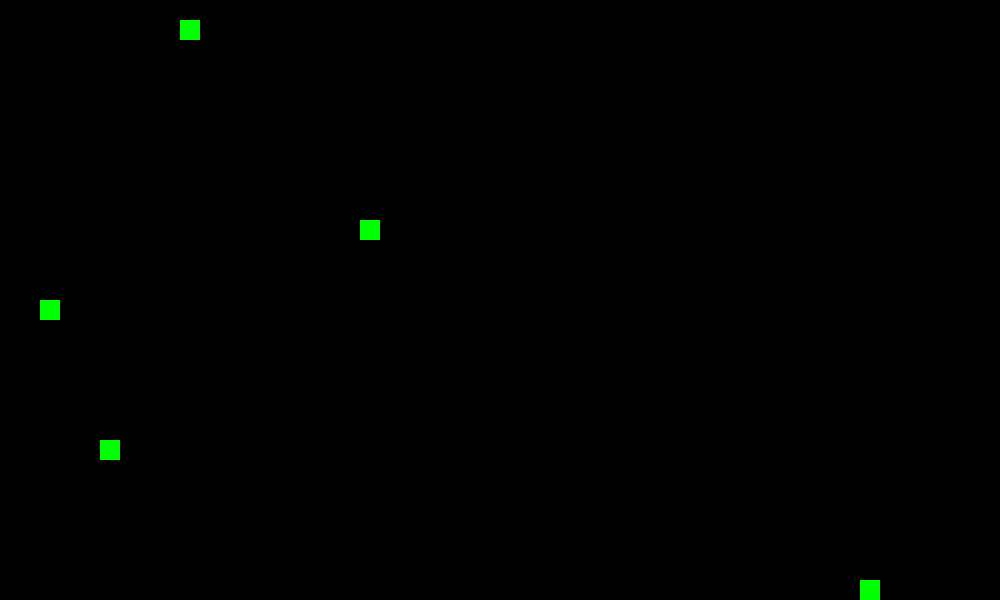

In [319]:
env.get_img()

In [320]:
# Setup simulation
sim = SimpleEpidemic(env,fps = 25)
sim.run_episode(n_steps = 250,save = False)

TypeError: isinstance() arg 2 must be a type or tuple of types

In [317]:
env._objects

{'e779049c-7ce9-11ea-9a6f-34415d8a70d1': Agent(x=42.0,y=23.0),
 'e779049d-7ce9-11ea-bf6c-34415d8a70d1': Agent(x=23.0,y=17.0),
 'e779049e-7ce9-11ea-a317-34415d8a70d1': Agent(x=9.0,y=18.0),
 'e779049f-7ce9-11ea-bd0d-34415d8a70d1': Agent(x=7.0,y=16.0),
 'e77904a0-7ce9-11ea-baff-34415d8a70d1': Agent(x=0.0,y=15.0)}

In [273]:
!start .

In [181]:
env.quit()

In [ ]:
env